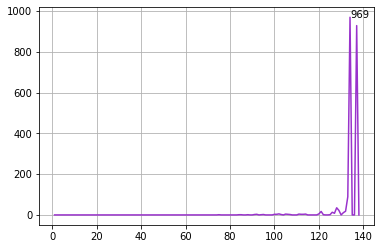

In [7]:
from IPython.display import clear_output
from Game import *
from Agent import *
from matplotlib import pyplot as plt
import time

game = Game(288, 512)
game.myBird.reset_play_mode()
AIBird = Agent(calculate_state(game.myBird, game.tubes))
epoch = 1
scores = []
init_time = time.time()
max_time = 3600 * 2
while True:
    s_ = game.ai_run(AIBird.choose_action(), epoch)
    if not game.game_over_flag:
        AIBird.update_q(s_, 1)
    else:
        AIBird.update_q(s_, -1000)
        scores.append(game.score)
        game.partial_init()
        game.myBird.reset_play_mode()
        AIBird.s = calculate_state(game.myBird, game.tubes)
        epoch += 1
        clear_output()
        plt.grid()
        plt.plot([i+1 for i in range(epoch-1)], scores, c='#9932CC')
        plt.text(np.argmax(scores) + 1, np.max(scores), str(int(np.max(scores))))
        plt.show()
    n_time = time.time()
    if n_time - init_time >= max_time:
        pygame.quit()
        break
